In [1]:
import numpy as np
from graphviz import Digraph
from IPython.display import display, SVG

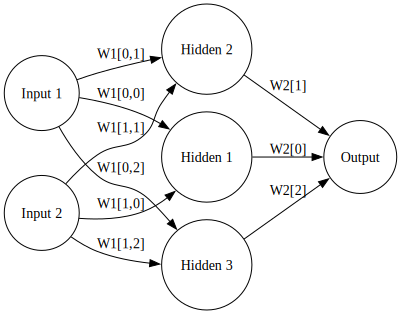

In [2]:
# Define the XOR dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([
    [0],
    [1],
    [1],
    [0]
])

# Define the neural network architecture
input_size = 2
hidden_size = 3
output_size = 1

# Initialize the weights
np.random.seed(1234)
W1 = np.random.randn(input_size, hidden_size)
W2 = np.random.randn(hidden_size, output_size)

# Create a directed graph
dot = Digraph()

# Set the graph direction to left-to-right
dot.attr(rankdir='LR')

# Add input layer nodes
for i in range(input_size):
    dot.node(f'Input {i + 1}', shape='circle')

# Add hidden layer nodes
for i in range(hidden_size):
    dot.node(f'Hidden {i + 1}', shape='circle')

# Add output layer node
dot.node('Output', shape='circle')

# Connect input layer to hidden layer with weight indexes
for i in range(input_size):
    for j in range(hidden_size):
        dot.edge(f'Input {i + 1}', f'Hidden {j + 1}', label=f'W1[{i},{j}]')

# Connect hidden layer to output layer with weight indexes
for i in range(hidden_size):
    dot.edge(f'Hidden {i + 1}', 'Output', label=f'W2[{i}]')

# Render the graph as SVG and display it
svg = dot.pipe(format='svg')
display(SVG(svg))

### 1. **Error Function (Loss Function)**
The error function measures how far the predicted outputs are from the actual outputs. For a binary classification task, the **Binary Cross-Entropy Loss** (also called log loss) is a better choice than Mean Squared Error (MSE) when using sigmoid as the activation function. Binary Cross-Entropy Loss encourages the model to output probabilities (close to 0 or 1) instead of arbitrary continuous values.

The Binary Cross-Entropy Loss is defined as:

$$
L = -\frac{1}{N} \sum_{i=1}^{N} \left( y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right)
$$

Where:
- \( y_i \) is the true label for the \(i\)-th training example,
- \( \hat{y}_i \) is the predicted probability for the \(i\)-th example (the output of the sigmoid function),
- \( N \) is the number of training examples.

### 2. **Optimization Function (Gradient Descent with Momentum)**
Rather than using standard gradient descent to update weights, we can use **gradient descent with momentum**. Momentum helps accelerate gradient vectors in the right direction, reducing oscillations and leading to faster convergence.

Momentum is defined as:

$$
v_t = \beta v_{t-1} + (1 - \beta) \nabla L
$$
$$
W = W - \alpha v_t
$$

Where:
- \( v_t \) is the velocity term,
- \( \beta \) is the momentum factor (typically around 0.9),
- \( \alpha \) is the learning rate,
- \( \nabla L \) is the gradient of the loss function \(L\).

### 3. **Weight Regularization (L2 Regularization)**
To prevent overfitting, L2 regularization (also known as weight decay) can be added. This adds a penalty to large weight values, ensuring the model generalizes better. The updated weight update rule with L2 regularization is:

$$
W = W - \alpha \left( \nabla L + \lambda W \right)
$$

Where \( \lambda \) is the regularization parameter.

### 4. **Weight Initialization**
Using better initialization strategies for the weights can improve convergence. A good approach is **Xavier initialization** (for sigmoid/tanh activations) or **He initialization** (for ReLU activations).

- **Xavier Initialization**:
$$
W \sim \mathcal{N}(0, \frac{1}{n_{in}})
$$
  where \( n_{in} \) is the number of input units to the layer.


1. **Error Function**: 
   - We use **Binary Cross-Entropy Loss** instead of Mean Squared Error, as it is more appropriate for classification tasks, particularly with sigmoid activation.

2. **Optimization**:
   - **Momentum** is introduced to speed up convergence and reduce oscillations in the updates of weights.
   - **L2 Regularization** (weight decay) is added to prevent overfitting.

3. **Improved Weight Initialization**:
   - We initialize the weights using **Xavier initialization** to ensure better learning at the start of training.



In [5]:
# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)


def binary_cross_entropy_loss(y, output):
    return -np.mean(y * np.log(output) + (1 - y) * np.log(1 - output))


# Weight initialization (Xavier)
def initialize_weights(input_size, hidden_size, output_size):
    w1 = np.random.randn(input_size, hidden_size) * np.sqrt(1 / input_size)
    w2 = np.random.randn(hidden_size, output_size) * np.sqrt(1 / hidden_size)
    return w1, w2


# Parameters
learning_rate = 0.1
epochs = 200000
momentum_factor = 0.8  # Momentum term
lambda_reg = 0.00001  # L2 regularization parameter keeps accuracy ~95% 

# Weight initialization
W1, W2 = initialize_weights(input_size, hidden_size, output_size)
v_W1, v_W2 = np.zeros_like(W1), np.zeros_like(W2)  # Initialize velocity for momentum

for epoch in range(epochs):
    # Forward propagation
    hidden_input = np.dot(X, W1)
    layer1 = sigmoid(hidden_input)

    output_input = np.dot(layer1, W2)
    output = sigmoid(output_input)

    # Compute loss
    loss = binary_cross_entropy_loss(y, output)

    # Backpropagation
    # Step 1: Calculate the error at the output layer
    output_error = output - y  # Derivative of BCE with sigmoid is (output - y)
    output_delta = output_error * sigmoid_derivative(output)

    # Step 2: Calculate the error at the hidden layer
    layer1_error = np.dot(output_delta, W2.T)
    layer1_delta = layer1_error * sigmoid_derivative(layer1)

    # Step 3: Update the weights using momentum and L2 regularization
    # Output layer weights update
    v_W2 = momentum_factor * v_W2 + (1 - momentum_factor) * np.dot(layer1.T, output_delta)
    W2 -= learning_rate * (v_W2 + lambda_reg * W2)

    # Hidden layer weights update
    v_W1 = momentum_factor * v_W1 + (1 - momentum_factor) * np.dot(X.T, layer1_delta)
    W1 -= learning_rate * (v_W1 + lambda_reg * W1)

    if (epoch + 1) % (int(epochs / 10)) == 0:
        print(f'Epoch {epoch + 1}, Loss: {loss}')

Epoch 20000, Loss: 0.22814015496791212
Epoch 40000, Loss: 0.1313055010796377
Epoch 60000, Loss: 0.09926046060093319
Epoch 80000, Loss: 0.0831553156128935
Epoch 100000, Loss: 0.07341587404750266
Epoch 120000, Loss: 0.06689006463616248
Epoch 140000, Loss: 0.06222646116316638
Epoch 160000, Loss: 0.05874445872703783
Epoch 180000, Loss: 0.05606184439420128
Epoch 200000, Loss: 0.053946371466600994


In [6]:
# Testing the trained model
test_input = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Step-by-step feedforward process
# Layer 1
layer1_input = np.dot(test_input, W1)
layer1_output = sigmoid(layer1_input)

# Layer 2 (Output Layer)
layer2_input = np.dot(layer1_output, W2)
predicted_output = sigmoid(layer2_input)

# Convert predictions to percentages
percented_output = predicted_output * 100

for i, prediction in enumerate(percented_output):
    rounded_output = round(predicted_output[i][0])
    print(f"Test: {test_input[i]} -> Predicted: {prediction[0]:.2f}% one (Rounded: {rounded_output})")


Test: [0 0] -> Predicted: 0.45% one (Rounded: 0)
Test: [0 1] -> Predicted: 93.97% one (Rounded: 1)
Test: [1 0] -> Predicted: 93.97% one (Rounded: 1)
Test: [1 1] -> Predicted: 8.32% one (Rounded: 0)
